In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark.conf.set("spark.sql.caseSensitive", True) # Avoid error "Found duplicate column(s) in the data schema"
spark

In [4]:
# In this example, we use 'Magazine_Subscriptions.json.gz' 
# First upload it to the runtime. 
# Then read in the data
my_Review_jewelry = spark.read.json("reviews_Clothing_Shoes_and_Jewelry_5 (2).json.gz")

# Take a look
my_Review_jewelry.show(5)

+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|      asin|helpful|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|             summary|unixReviewTime|
+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|0000031887| [0, 0]|    5.0|This is a great t...|02 12, 2011|A1KLRMWW2FWPL4|Amazon Customer "...|Great tutu-  not ...|    1297468800|
|0000031887| [0, 0]|    5.0|I bought this for...|01 19, 2013|A2G5TCU2WDFZ65|     Amazon Customer|         Very Cute!!|    1358553600|
|0000031887| [0, 0]|    5.0|What can I say......| 01 4, 2013|A1RLQXYNCMWRWN|              Carola|I have buy more t...|    1357257600|
|0000031887| [0, 0]|    5.0|We bought several...|04 27, 2014| A8U3FAMSJVHS5|             Caromcg|    Adorable, Sturdy|    1398556800|
|0000031887| [0, 0]|    5.0|Thank you Halo He...|03 15, 2014|A

In [5]:
my_Review_jewelry.toPandas().shape

(278677, 9)

In [7]:
my_Review_jewelry.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278677 entries, 0 to 278676
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            278677 non-null  object 
 1   helpful         278677 non-null  object 
 2   overall         278677 non-null  float64
 3   reviewText      278677 non-null  object 
 4   reviewTime      278677 non-null  object 
 5   reviewerID      278677 non-null  object 
 6   reviewerName    278225 non-null  object 
 7   summary         278677 non-null  object 
 8   unixReviewTime  278677 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 19.1+ MB


In [8]:
my_Review_jewelry.toPandas().isnull().sum()

asin                0
helpful             0
overall             0
reviewText          0
reviewTime          0
reviewerID          0
reviewerName      452
summary             0
unixReviewTime      0
dtype: int64

# Year Wise product wise reviews

*   List item
*   List item



In [9]:
#

In [13]:

# More operations are available from Spark's SQL functions
from pyspark.sql import functions as f

# Subset by filtering for the year 2014
mySet_2014 = my_Review_jewelry.where(f.col("reviewTime").contains("2014"))

# Now summarise the average ratings for each product
mySet_2014.groupBy("asin").agg(
    f.count("overall").alias("num_reviews"),
    f.avg("overall").alias("rating")
).sort("num_reviews",ascending=False).show(10)


+----------+-----------+------------------+
|      asin|num_reviews|            rating|
+----------+-----------+------------------+
|B005LERHD8|        172|4.3313953488372094|
|B00CKGB85I|        156| 4.083333333333333|
|B0068VM5T4|        134|  4.58955223880597|
|B005GYGD7O|        128|         4.1640625|
|B008WYDP1C|        127| 4.141732283464567|
|B00DQYNS3I|        112| 4.517857142857143|
|B008KK0ZJ8|        104| 4.663461538461538|
|B008X0EW44|        102| 3.823529411764706|
|B004R1II48|        100|              4.04|
|B0058XIMMM|         98|  4.63265306122449|
+----------+-----------+------------------+
only showing top 10 rows



In [14]:
mySet_2013 = my_Review_jewelry.where(f.col("reviewTime").contains("2013"))

# Now summarise the average ratings for each product
mySet_2013.groupBy("asin").agg(
    f.count("overall").alias("num_reviews"),
    f.avg("overall").alias("rating")
).sort("num_reviews",ascending=False).show(10)

+----------+-----------+------------------+
|      asin|num_reviews|            rating|
+----------+-----------+------------------+
|B005LERHD8|        232| 4.258620689655173|
|B007RD9DS8|        143| 3.902097902097902|
|B005GYGD7O|        131| 4.297709923664122|
|B007WNWEFC|        127| 4.275590551181103|
|B0058XIMMM|        123|  4.59349593495935|
|B008WYDP1C|        118| 4.364406779661017|
|B0067GUM2W|        116| 4.258620689655173|
|B004Q7AB4I|        105| 4.333333333333333|
|B007NLX16O|        100|              4.53|
|B004YM2FV2|         97|3.6907216494845363|
+----------+-----------+------------------+
only showing top 10 rows



In [15]:
mySet_2012 = my_Review_jewelry.where(f.col("reviewTime").contains("2012"))

# Now summarise the average ratings for each product
mySet_2012.groupBy("asin").agg(
    f.count("overall").alias("num_reviews"),
    f.avg("overall").alias("rating")
).sort("num_reviews",ascending=False).show(10)

+----------+-----------+-----------------+
|      asin|num_reviews|           rating|
+----------+-----------+-----------------+
|B000T9VK56|         44|3.227272727272727|
|B0001ZNZJM|         41|4.317073170731708|
|B001AOZVSQ|         36|4.555555555555555|
|B005LERHD8|         36|4.277777777777778|
|B00012O12A|         32|          3.84375|
|B0008EOEPK|         32|           4.6875|
|B0000C321X|         32|           4.1875|
|B000NGKLNC|         30|4.266666666666667|
|B000O32MLI|         29|4.448275862068965|
|B005GYGD7O|         27|4.333333333333333|
+----------+-----------+-----------------+
only showing top 10 rows



In [16]:
#OVERALL REVIEWS........

mySet = my_Review_jewelry
# Now summarise the average ratings for each product
mySet_sorted = mySet.groupBy("asin").agg(
    f.count("overall").alias("num_reviews"),
    f.avg("overall").alias("rating")
).sort("num_reviews",ascending=False).show(10)



+----------+-----------+------------------+
|      asin|num_reviews|            rating|
+----------+-----------+------------------+
|B005LERHD8|        441| 4.290249433106576|
|B005GYGD7O|        286| 4.241258741258742|
|B008WYDP1C|        249| 4.257028112449799|
|B0058XIMMM|        241| 4.618257261410788|
|B00CKGB85I|        225| 4.066666666666666|
|B007RD9DS8|        217| 3.903225806451613|
|B002RADHJC|        211| 3.943127962085308|
|B000T9VK56|        207|3.8405797101449277|
|B0000C321X|        205| 4.263414634146342|
|B0001ZNZJM|        197| 4.472081218274112|
+----------+-----------+------------------+
only showing top 10 rows



In [17]:
from pyspark.sql import functions as f

# Set up sentiment column based on rating
myData = my_Review_jewelry.withColumn(
    # Name a new column
    "sentiment",
    # Use "when" for conditional setup
    f.when((f.col("overall")>=4),"positive")
    # Negative coded as 0
    .when((f.col("overall")<=2),"negative")
    .when((f.col("overall")==3),"neutral")
    )

In [ ]:
myData.show()

+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+---------+
|      asin|helpful|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|             summary|unixReviewTime|sentiment|
+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+---------+
|0000031887| [0, 0]|    5.0|This is a great t...|02 12, 2011|A1KLRMWW2FWPL4|Amazon Customer "...|Great tutu-  not ...|    1297468800| positive|
|0000031887| [0, 0]|    5.0|I bought this for...|01 19, 2013|A2G5TCU2WDFZ65|     Amazon Customer|         Very Cute!!|    1358553600| positive|
|0000031887| [0, 0]|    5.0|What can I say......| 01 4, 2013|A1RLQXYNCMWRWN|              Carola|I have buy more t...|    1357257600| positive|
|0000031887| [0, 0]|    5.0|We bought several...|04 27, 2014| A8U3FAMSJVHS5|             Caromcg|    Adorable, Sturdy|    1398556800| po

In [23]:
# Tidy up the text data

myData = (myData
          #Remove special characters
          .withColumn("reviewText", f.regexp_replace(f.col("reviewText"), "[^a-zA-Z']", " "))
          #Remove leading and trailing whitespaces
          .withColumn("reviewText", f.trim(f.col("reviewText")))
          #Restrict the length of the string
          .filter(f.length("reviewText")>5)
          )

In [24]:
myData.groupBy("sentiment").count()

sentiment,count
positive,221498
neutral,30412
negative,26648


In [25]:
myData_2014 = my_Review_jewelry.where(f.col("reviewTime").contains("2014"))
myData_2014 = (myData_2014
          #Remove special characters
          .withColumn("reviewText", f.regexp_replace(f.col("reviewText"), "[^a-zA-Z']", " "))
          #Remove leading and trailing whitespaces
          .withColumn("reviewText", f.trim(f.col("reviewText")))
          #Restrict the length of the string
          .filter(f.length("reviewText")>5)
          )

In [26]:
# Collect a sample for modelling

# Get the positive ones
myDataPos = myData.filter("sentiment = 'positive'")

# Get the negative ones
myDataNeg = myData.filter("sentiment = 'negative'")

# Get a random sample from positive
myDataPosSample = myDataPos.sample(fraction=5000/myDataPos.count(), seed=9165)

# Get a random sample from negative
myDataNegSample = myDataNeg.sample(fraction=5000/myDataNeg.count(), seed=9165)

# Combine into a single sample
mySample = myDataPosSample.union(myDataNegSample)

In [27]:
mySample.groupBy("sentiment").count()

sentiment,count
positive,5076
negative,4966


In [28]:
# Use nickname feat for the subpackage
import pyspark.ml.feature as feat

# We need Pipeline to streamline the workflow
from pyspark.ml import Pipeline

# Use logistic regression
from pyspark.ml.classification import LogisticRegression

In [29]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
# Import an evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

In [30]:
(training, test) = mySample.randomSplit([0.8, 0.2],seed = 9165)

In [31]:
# Build another pipeline for Random Forest

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
    , vocabSize=5000
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "sentiment"
    , outputCol = "label"
)

# Random forest model
rf = RandomForestClassifier(
)


# Finally set up the pipline
sentiment_pipeline_idf_rf = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , rf
            ]
)

In [32]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(idf_cal.minDocFreq, [5, 10]) \
          .addGrid(rf.numTrees, [20, 40]) \
          .addGrid(rf.maxDepth, [5, 4]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_rf,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Random Forest model with the test data is %g"% (cv_accuracy))

In [ ]:
# More operations are available from Spark's SQL functions
from pyspark.sql import functions as f

# Use nickname feat for the subpackage
import pyspark.ml.feature as feat

# We need Pipeline to streamline the workflow
from pyspark.ml import Pipeline

# Use logistic regression
from pyspark.ml.classification import LogisticRegression, NaiveBayes

# Import an evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Additional functions for tuning parameters
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
# In this example, we use 'Magazine_Subscriptions.json.gz' 
# First upload it to the runtime. 
# Then read in the data
myReview = spark.read.json("reviews_Clothing_Shoes_and_Jewelry_5 (2).json.gz")

# Set up sentiment column based on rating
myData = myReview.withColumn(
    # Name a new column
    "sentiment",
    # Use "when" for conditional setup
    f.when((f.col("overall")>=4),"positive")
    # Negative coded as 0
    .when((f.col("overall")<=2),"negative")
    )

# Tidy up the text data

myData = (myData
          #Remove special characters
          .withColumn("reviewText", f.regexp_replace(f.col("reviewText"), "[^a-zA-Z']", " "))
          #Remove leading and trailing whitespaces
          .withColumn("reviewText", f.trim(f.col("reviewText")))
          #Restrict the length of the string
          .filter(f.length("reviewText")>5)
          )

# Collect a sample for modelling

# Get the positive ones
myDataPos = myData.filter("sentiment = 'positive'")

# Get the negative ones
myDataNeg = myData.filter("sentiment = 'negative'")

# Get a random sample from positive
myDataPosSample = myDataPos.sample(fraction=5000/myDataPos.count(), seed=9165)

# Get a random sample from negative
myDataNegSample = myDataNeg.sample(fraction=5000/myDataNeg.count(), seed=9165)

# Combine into a single sample
mySample = myDataPosSample.union(myDataNegSample)

# Take a look
mySample.groupBy("sentiment").count()

In [ ]:
# Make a split

(training, test) = mySample.randomSplit([0.8, 0.2],seed = 9165)

In [ ]:
# Build up the pipeline/workflow for Logistic Regression

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
    , minDocFreq=5 
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "sentiment"
    , outputCol = "label"
)

# Logistic Regression model
lr = LogisticRegression(
    maxIter=100
)


# Finally set up the pipline
sentiment_pipeline_idf_lr = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , lr
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(count_vec.vocabSize, [3000, 5000]) \
          .addGrid(lr.regParam, [0.1, 5]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_lr,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Logistic Regression model with the test data is %g"% (cv_accuracy))

## Naive Bayes

In [ ]:
# Build up the pipeline/workflow for Naive Bayes

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
    , minDocFreq=5 
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "sentiment"
    , outputCol = "label"
)

# Naive Bayes model
nb = NaiveBayes(
)


# Finally set up the pipline
sentiment_pipeline_idf_nb = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , nb
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(count_vec.vocabSize, [3000, 5000]) \
          .addGrid(nb.smoothing, [1, 0]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_nb,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Naive Bayes model with the test data is %g"% (cv_accuracy))

In [7]:
#Importing packages from natural language tool kit....
#At first import regular expressions
import re

# Get a bunch of tools from nltk

import nltk
nltk.download('punkt') #
nltk.download('stopwords') #corpus of default stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
# Create an empty list to store the cleaned reviews
cleaned_review = []

#Renaming the dataset into a new name and to pandas
myData = my_Review_jewelry.toPandas()

# Tidy up the reviews
for review in myData['reviewText'].apply(str): 
  # Remove special characters
  review = re.sub("[^a-zA-Z']"," ",review)
  #Remove leading and trailing whitespaces
  review = review.strip()
  #Restrict the length of the string
  if len(review) > 5:
    cleaned_review.append(review)

In [17]:
# Concatenate all the reviews into a single string
all_review = ' '.join(cleaned_review)

# Tokenise into words
myWords = word_tokenize(all_review)

# Need a dictionary of stop words
en_stopwords = set(stopwords.words('english'))

# Remove stop words
# Only keep words with more than 3 letters
# Lowercase the words
myWords_noSW_noCase = [word.lower() for word in myWords if (word not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDist = FreqDist(myWords_noSW_noCase)

# Take a look
fDist.most_common(10)

[('like', 91186),
 ('size', 87356),
 ('wear', 80491),
 ('great', 79747),
 ('would', 67820),
 ('they', 66779),
 ('good', 61501),
 ('well', 61338),
 ('love', 60681),
 ('comfortable', 58608)]

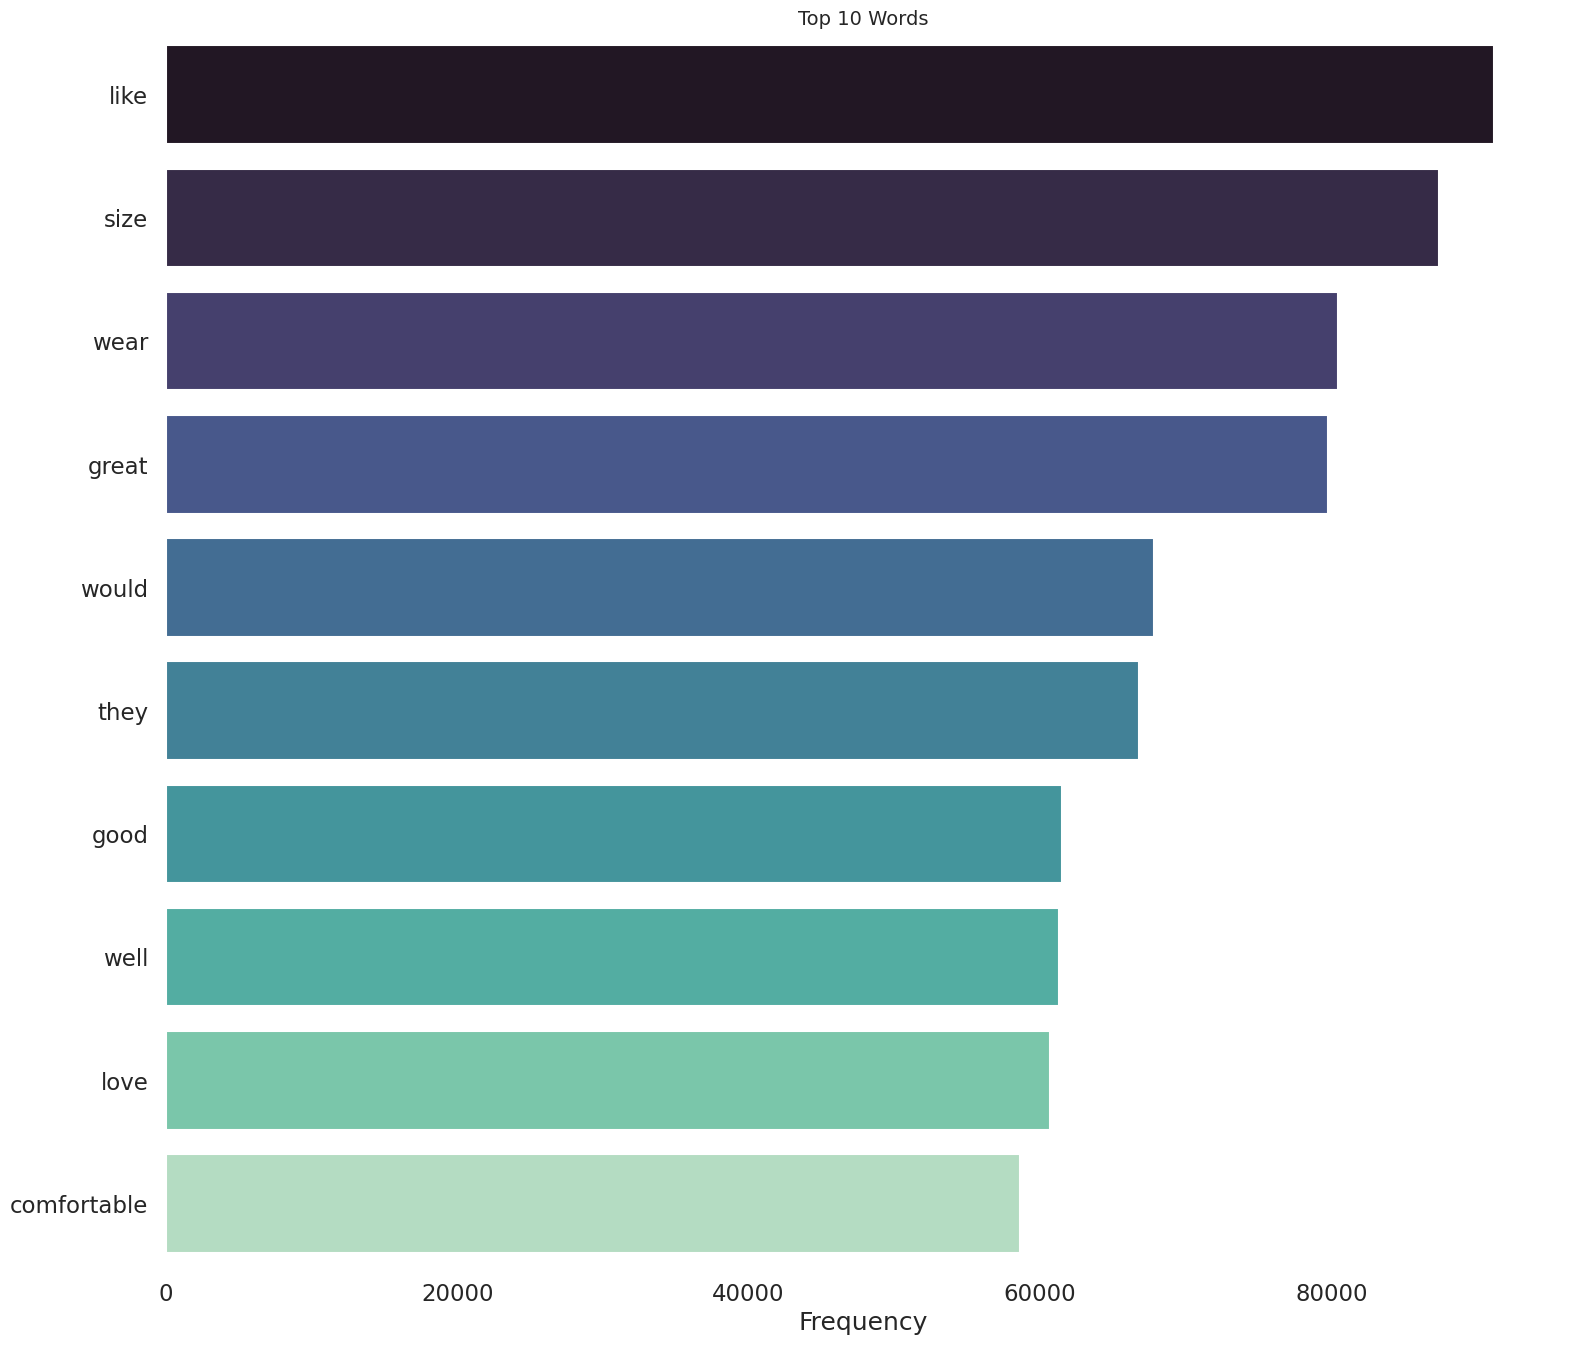

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the result to a dataframe for visualisation
myDF = pd.DataFrame(fDist.most_common(10), columns=['word', 'frequency'])

# Set a more specific style
sns.set_theme(style="white", context="talk")
#sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,16))

# x and y will control if the barplot is horizontal or vertical
sns.barplot(x="frequency", 
            y="word",
            data=myDF,
            palette="mako"
            )

# Add label to horiztontal axis
ax.set_xlabel("Frequency")

# Remove ylabel
ax.set_ylabel("")

# Add a title
ax.set_title("Top 10 Words", fontsize = 14)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("top10.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

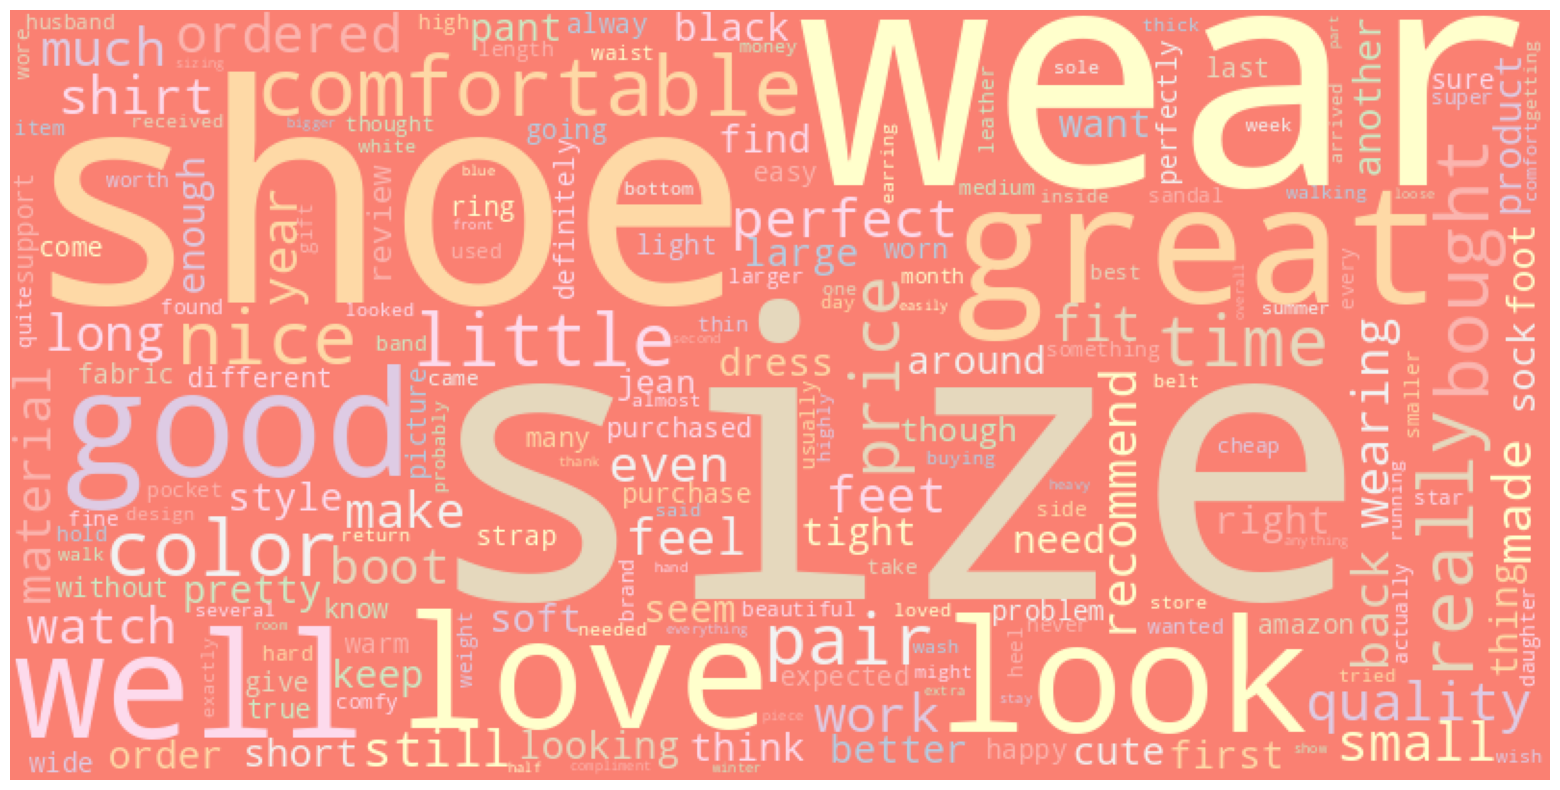

In [19]:
# Use the package wordcloud
from wordcloud import WordCloud

# WordCloud will take a single string to generate a word cloud
myString = " ".join(myWords_noSW_noCase)

# Prepare the word cloud
myCloud = WordCloud(random_state=9165,
                    width=800, height=400, 
                    # collocations=True will include 2 words/bigrams
                    collocations=False,
                    background_color='salmon', 
                    colormap='Pastel1'
                    ).generate(myString)

# Set up the figure
plt.figure(figsize=(20,10))
plt.imshow(myCloud)
plt.axis("off")

# Save the figure
plt.savefig('wordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

# Recommendation system using model based Customer -Product interaction:

In [5]:
my_Review_jewelry.columns

['asin',
 'helpful',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'reviewerName',
 'summary',
 'unixReviewTime']

In [12]:
my_Review_jewelry.describe()

summary,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
count,278677,278677,278677,278677,278677,278225,278677,278677
mean,8.19378236137931E8,4.245133254628118,null,null,null,NaN,Infinity,1.3741973862615142E9
stddev,8.015430880783154E8,1.1037471651961202,null,null,null,NaN,NaN,2.9045102075575456E7
min,0000031887,1.0,,"01 1, 2008",A001114613O3F18Q5..., 26.2 ...,!,1048896000
max,B00KKXCJQU,5.0,~Why do I dread t...,"12 9, 2013",AZZYW4YOE1B6E,~~~,~~Great Soft fitt...,1406073600


In [29]:
#Vector assembler is used to compile all the columns apart from the identifier into an array

#Import Vector Assembler from the ML features.....
from pyspark.ml.feature import VectorAssembler

my_Review_jewelry = my_Review_jewelry.dropna().show(truncate=False)

#Type casting the "asin" column that is the product ID from str to float.....
my_Review_jewelry_1 = my_Review_jewelry.withColumn("asin",my_Review_jewelry["asin"].cast('bigint'))

#my_Review_jewelry_1 = my_Review_jewelry.withColumn("reviewerID",my_Review_jewelry_1["reviewerID"].cast('st'))

columns_not_used = ["helpful","reviewText","reviewTime","summary","reviewerName","unixReviewTime"]
my_Review_jewelry_1 = my_Review_jewelry_1.drop(*columns_not_used)


my_Review_jewelry_1.columns
vectored_array = VectorAssembler(inputCols=['asin',
                                            'overall',
                                            
 ], outputCol='variables')

assembled_data = vectored_array.transform(my_Review_jewelry_1)
assembled_data.show(2)

AttributeError: ignored

In [18]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='variables',outputCol='standardized')
data_scale= scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
data_scale_output.show(2)

Py4JJavaError: ignored

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

#Arrays for silhouette scores......
silhouette_score=[]
evaluator = ClusteringEvaluator(featuresCol='variables', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')


In [ ]:
for i in range(2,10):
    
    KMeans_algo = KMeans(featuresCol='variables', k=i)
    KMeans_model = KMeans_algo.fit(my_Review_jewelry_1)
    output  =  KMeans_model.transform(my_Review_jewelry_1)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)